In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
%matplotlib inline

In [43]:
loansData=pd.read_csv('LoanStats3b.csv',header=1,low_memory=False)

In [96]:
#Data Shaping
loansData['issue_d_format']=pd.to_datetime(loansData['issue_d'])
loansDataT=loansData.set_index('issue_d_format')
year_month_summary=loansDataT.groupby(lambda x : x.year*100 + x.month).count()
loan_count_summary=year_month_summary['issue_d']

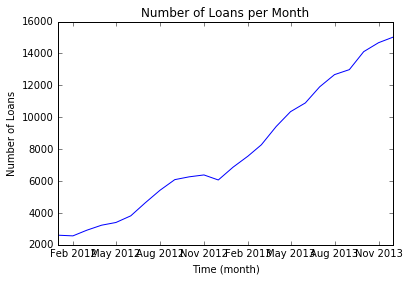

In [130]:
#Plot time-series
loan_time = [datetime.strptime(str(int(x)), "%Y%m") for x in loan_count_summary.index]

plt.plot(loan_time,loan_count_summary.values)
plt.title('Number of Loans per Month')
plt.xlabel('Time')
plt.ylabel('Number of Loans')

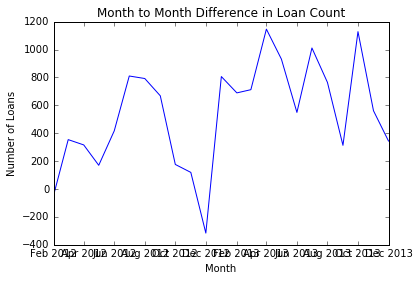

In [143]:
#Stabilize loan count data
#Original data is not stationary, calculate x_i+1 - x_i
#to make data stationary.
diffLoanCS = []
i=1
while i < len(loan_count_summary.values):
    diffLoanCS.append(loan_count_summary.values[i]-loan_count_summary.values[i-1])
    i += 1

plt.plot(loan_time[1:],diffLoanCS)
plt.title('Month to Month Difference in Loan Count')
plt.xlabel('Month')
plt.ylabel('Number of Loans')

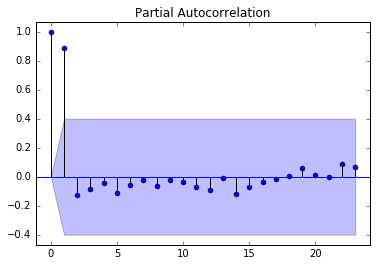

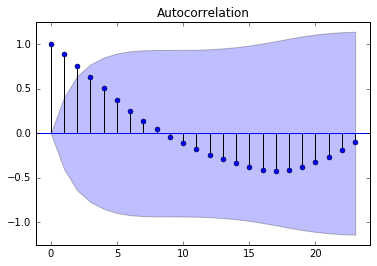

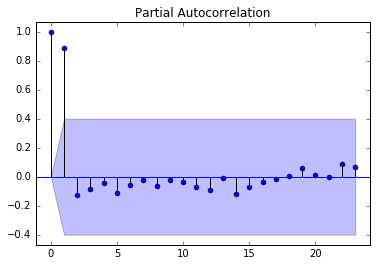

In [151]:
#PACF & ACF of original loan count data
sm.graphics.tsa.plot_acf(loan_count_summary.values)
sm.graphics.tsa.plot_pacf(loan_count_summary.values)

#Autocorrelated structures are present.  Autocorrelation
#suggests a seasonality component to the time-series data
#due to the oscillation.  Partial autocorrelation suggests
#a trend in the original data due to grandual increase over
#the entire dataset.  The model should include a seasonal
#and trend term to compensate for the structures observed.

print('Structures Observed')

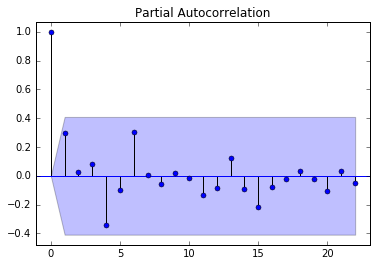

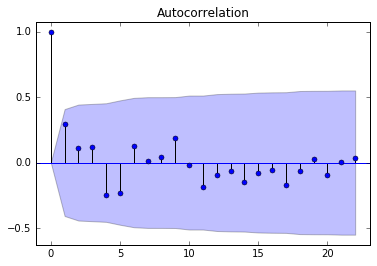

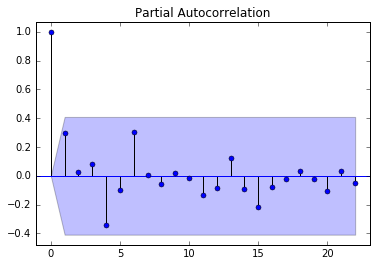

In [152]:
#PACF & ACF of original loan count data
sm.graphics.tsa.plot_acf(diffLoanCS)
sm.graphics.tsa.plot_pacf(diffLoanCS)

#Autocorrelated structures are not present.  Stabilizing
#the data eliminated the patterns previously observed.

print('Structures Not Observed')